<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: Vadim Shestopalov (@vchulski), Valentina Biryukova (@myltykritik), and Yury Kashnitsky (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Fall 2019. Quiz 3. Unsupervised learning & time series

Prior to working on this quiz, you'd better check out the corresponding course material:
 - [Unsupervised learning: PCA and clustering](https://mlcourse.ai/articles/topic7-unsupervised/), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering)
 - [Time series analysis with Python](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)
 - [Predicting future with Facebook Prophet](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part2_facebook_prophet.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-9-part-2-time-series-with-facebook-prophet)
 
Also, checkout corresponding mlcourse.ai [video lectures](https://mlcourse.ai/lectures)

### Your task is to:
 1. study the materials 
 1. write code where needed
 1. choose answers in the [webform](https://docs.google.com/forms/d/11bOOegz0U3pATEOhBH6ZV1m7sLOAcc-n0C9WjJygEQE)
 
Solutions are discussed during a [live YouTube session](https://youtu.be/xVnCdzGrOfk) on November 16.   You can get up to 10 credits (those points in a web-form, 15 max, will be scaled to a max of 10 credits). 
 
### <center> Deadline for Quiz 3: 2019 November 15, 20:59 GMT (London time)

## Part 1. Unsupervised learning

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz3\_part1\_fall2019__*. TA for this part is Yury **@yorko**.

**Question 1.** Using the face recognition dataset downloaded with the code below choose the best number of `n_components` to achieve best accuracy on holdout set (holdout part should be 30% of the training set) using SVM model for classification (`SVC`) with the following params: `gamma=0.01` and `class_weight='balanced'` <br> Note: Use random seed equal to `17` everywhere (`train_test_split`, `PCA` and `SVC`). Also, specify `whiten=True` for PCA, this will normalize variances of PCA components and will positively affect classification just like in case of using `StandardScaler`.   

<br> What number of PCA components maximizes holdout accuracy of the SVM model?

 1. 50
 1. **100** [+]
 1. 150
 1. 200

In [4]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
# Download the data and load it as numpy arrays
lfw_people = fetch_lfw_people(data_home='../../data/faces/',
                              min_faces_per_person=70, resize=0.4)

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_features: 1850
n_classes: 7


In [3]:
for i, count in enumerate(np.bincount(y)):
    print(f'{count} photos of {target_names[i]}' )

77 photos of Ariel Sharon
236 photos of Colin Powell
121 photos of Donald Rumsfeld
530 photos of George W Bush
109 photos of Gerhard Schroeder
71 photos of Hugo Chavez
144 photos of Tony Blair


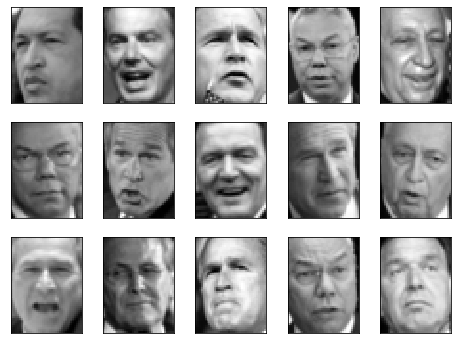

In [4]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

In [46]:
# You code here
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, test_size=0.3, random_state=17)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 901 Test size: 387


In [47]:
def write_pca_var(n_components, X_train, pca):
    pca = PCA(n_components=n_components, svd_solver='randomized', random_state=17, whiten=True)
    pca.fit(X_train)

    print('{} principal components explain %.2f%% of variance'.format(n_components) %
          (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
    """plt.figure(figsize=(10,7))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
    plt.xlabel('Number of components')
    plt.ylabel('Total explained variance')
    plt.xlim(0, n_components)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()"""
    
    return pca

In [48]:
for i in [50, 100, 150, 200]:
    pca = write_pca_var(i, X_train, pca)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = SVC(gamma=0.01, class_weight='balanced', random_state=17).fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    
    print("Accuracy for {} components: %f".format(i) % accuracy_score(y_test, y_pred))

50 principal components explain 86.23% of variance
Accuracy for 50 components: 0.790698
100 principal components explain 92.80% of variance
Accuracy for 100 components: 0.829457
150 principal components explain 95.69% of variance
Accuracy for 150 components: 0.736434
200 principal components explain 97.25% of variance
Accuracy for 200 components: 0.573643


**Question 2**. Choose the correct option. In K-means algorithm at each iteration: 
 1. Centroid of the cluster is moved in a random direction to increase robustness of the solution
 1. **Each instance is attributed to a closest centroid** [+]
 1. K is increased by 1
 1. All of the above

**Question 3**. Select all correct statements about agglomerative clustering

1. **At each step, two random instances are merges to form a cluster** [+]
1. **The algorithm terminates when all instances are merged into one cluster** [+]
1. The ultimate number of iterations of the algorithm is $n$, where $n$ is the number of instances in the data set
1. **Output of the algorithm depends on the way to define distance between clusters, i.e. *linkage*** [+]

**Question 4.** For which of the following clustering algorithms shall one specify the number of clusters beforehand?
 1. Agglomerative clustering
 1. **K-means** [+]
 1. Affinity Propagation
 1. All of the above

**Question 5.** Which of the following metrics, assessing clustering quality, can be calculated without knowing true cluster labels?
 1. Adjusted Mutual Information (AMI) 
 1. **Silhouette** [+]
 1. Completeness
 1. None of the above

## Part 2. Time series

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz3\_part2\_fall2019__*. TA for this part is Valentina **@myltykritik**.

**Question 6.** Which of the following is an example of time series? Select all correct options.
1. **Daily temperature in Moscow for 20 years [+]**
1. Texts of news from Times site
1. Pigeon population in different Russian cities in 2019 **[??]**
1. **GPS-coordinates of someone's trajectory [+]**

**Question 7.** Which of these are possible components of a time series?
1. **Trend [+]**
1. **Seasonality [+]**
1. Noise
1. Cyclical
1. All of the above

**Question 8.** Sales of some products in July were 200, in August - 600, in September - 500, in October - 100. What is the 3 month Moving Average forecast for November?
1. 200
1. 300
1. **400** [+]
1. 500

**Question 9.**
You have some stock (S&P) data [from here](https://www.kaggle.com/camnugent/sandp500/download) for five years until February 2018 and want to make prediction model for Facebook stocks. You need `FB_data.csv` file - it's committed to the course repo as well. 

1. Split the data into training and test sets. Everything before 01.09.2017 (`pd.datetime(2017, 9, 1)`) would form a training set. The rest would be a test set.
2. Train the `Prophet()` model with default parameters
3. Measure MAPE (mean average percentage error) for the test set

What test set MAPE do you get (approx.)?

1. **2.5% [+]**
1. 3.5%
1. 4.5%
1. 5.5%

In [1]:
from fbprophet import Prophet

In [13]:
import logging
logging.getLogger().setLevel(logging.ERROR)

In [2]:
!pip list | grep prophet

fbprophet                          0.5       


In [19]:
df.ds.max(), df.ds.min()

(Timestamp('2018-02-07 00:00:00'), Timestamp('2013-02-08 00:00:00'))

In [5]:
df = pd.read_csv('../../data/FB_data.csv')
df = df[['date', 'close']].reset_index(drop=True)
df = df.rename({'close':'y', 'date':'ds'}, axis='columns')
df['ds'] = pd.to_datetime(df['ds'])

In [14]:
# You code here
#X_train, y_train = df[df.ds < pd.datetime(2017, 9, 1)]['ds'], df[df.ds < pd.datetime(2017, 9, 1)]['y']
#X_test, y_test = df[df.ds >= pd.datetime(2017, 9, 1)]['ds'], df[df.ds >= pd.datetime(2017, 9, 1)]['y']
train_df = df[df['ds'] < pd.datetime(2017, 9, 1)]
test_df = df[df['ds'] >= pd.datetime(2017, 9, 1)]

In [34]:
dif = test_df['ds'].max() - test_df['ds'].min()

In [36]:
dif.days

159

In [15]:
pr = Prophet()
pr.fit(train_df)

C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [38]:
future = pr.make_future_dataframe(periods=dif.days)
future.tail(3)

,ds
1306,2018-02-04
1307,2018-02-05
1308,2018-02-06


In [39]:
forecast = pr.predict(future)
forecast.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1306,2018-02-04,185.600239,169.555650,192.352062,175.098269,196.840133,-4.633292,-4.633292,-4.633292,-0.580024,-0.580024,-0.580024,-4.053269,-4.053269,-4.053269,0.0,0.0,0.0,180.966946
1307,2018-02-05,185.737578,171.426574,193.801066,175.113370,197.107159,-3.744480,-3.744480,-3.744480,0.167592,0.167592,0.167592,-3.912072,-3.912072,-3.912072,0.0,0.0,0.0,181.993098
1308,2018-02-06,185.874917,170.762337,194.263699,175.131173,197.358485,-3.618698,-3.618698,-3.618698,0.159657,0.159657,0.159657,-3.778356,-3.778356,-3.778356,0.0,0.0,0.0,182.256218


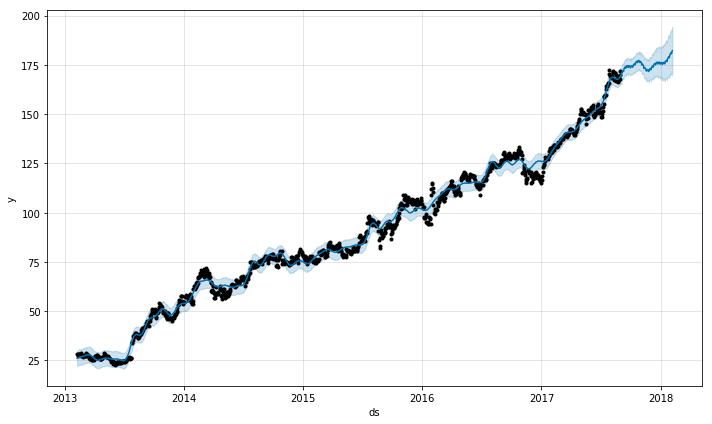

In [41]:
pr.plot(forecast);

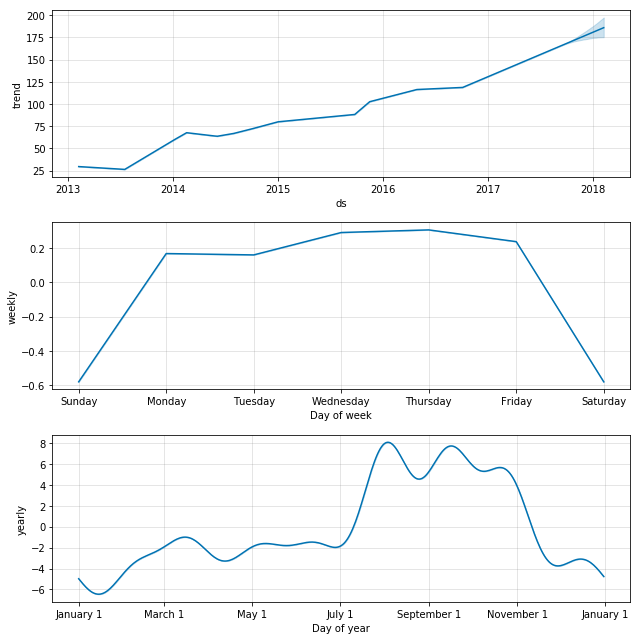

In [42]:
pr.plot_components(forecast);

In [43]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-02-08,29.425381,22.362748,30.007682,29.425381,29.425381,-3.269899,-3.269899,-3.269899,0.237074,0.237074,0.237074,-3.506973,-3.506973,-3.506973,0.0,0.0,0.0,26.155482
1,2013-02-11,29.365648,22.321559,30.198561,29.365648,29.365648,-3.041577,-3.041577,-3.041577,0.167592,0.167592,0.167592,-3.209169,-3.209169,-3.209169,0.0,0.0,0.0,26.324072
2,2013-02-12,29.345737,22.440411,30.213744,29.345737,29.345737,-2.965177,-2.965177,-2.965177,0.159657,0.159657,0.159657,-3.124834,-3.124834,-3.124834,0.0,0.0,0.0,26.380560
3,2013-02-13,29.325826,22.766309,30.459774,29.325826,29.325826,-2.756688,-2.756688,-2.756688,0.290235,0.290235,0.290235,-3.046923,-3.046923,-3.046923,0.0,0.0,0.0,26.569138
4,2013-02-14,29.305915,22.610665,30.766633,29.305915,29.305915,-2.669116,-2.669116,-2.669116,0.305489,0.305489,0.305489,-2.974606,-2.974606,-2.974606,0.0,0.0,0.0,26.636798
5,2013-02-15,29.286004,22.837212,30.728861,29.286004,29.286004,-2.669883,-2.669883,-2.669883,0.237074,0.237074,0.237074,-2.906957,-2.906957,-2.906957,0.0,0.0,0.0,26.616121
6,2013-02-19,29.206360,22.862253,30.646890,29.206360,29.206360,-2.503064,-2.503064,-2.503064,0.159657,0.159657,0.159657,-2.662721,-2.662721,-2.662721,0.0,0.0,0.0,26.703295
7,2013-02-20,29.186448,23.059911,30.932490,29.186448,29.186448,-2.312925,-2.312925,-2.312925,0.290235,0.290235,0.290235,-2.603160,-2.603160,-2.603160,0.0,0.0,0.0,26.873523
8,2013-02-21,29.166537,23.030716,30.394834,29.166537,29.166537,-2.236837,-2.236837,-2.236837,0.305489,0.305489,0.305489,-2.542327,-2.542327,-2.542327,0.0,0.0,0.0,26.929700
9,2013-02-22,29.146626,22.610938,30.911964,29.146626,29.146626,-2.242373,-2.242373,-2.242373,0.237074,0.237074,0.237074,-2.479447,-2.479447,-2.479447,0.0,0.0,0.0,26.904253


In [45]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2018-02-04,180.966946,169.555650,192.352062,NaN
2018-02-05,181.993098,171.426574,193.801066,181.26
2018-02-06,182.256218,170.762337,194.263699,185.31


In [46]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [48]:
for err_name, err_value in calculate_forecast_errors(cmp_df, dif.days).items():
    print(err_name, err_value)

MAPE 2.524365523115612
MAE 4.531263886222344


**Question 10.** What steps should we perform when doing cross-validation for time series? Select all correct answers.

1. Sort your data by time to emphasize time pattern **[??]**
1. No way! Shuffle all the data well, so model will not leak on random patterns!
1. Make several folds, so in validation will be all data from initial series ↓ [image credit](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85)
    <img src="../../img/kfold.png" width=400>
1. **No way! Perform method, known as "cross-validation on a rolling basis".** [+]
    <img src="../../img/time_series_cv.png" width="400">